In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris

%matplotlib inline
%config InlineBackend.figure_format='svg'

In [2]:
# load data
iris = load_iris()
df = pd.DataFrame(iris.data, columns=iris.feature_names)
df['label'] = iris.target

In [3]:
df.columns = [
    'sepal length', 'sepal width', 'petal length', 'petal width', 'label'
]
df.label.value_counts()

2    50
1    50
0    50
Name: label, dtype: int64

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  after removing the cwd from sys.path.
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  """


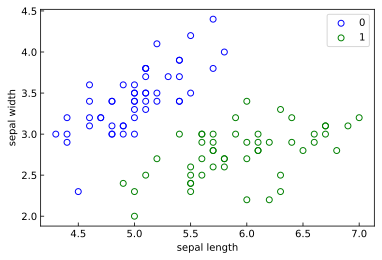

In [4]:
# display data
plt.figure(figsize=(6,4))
plt.tick_params(direction='in')
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'],c='',edgecolors='b',label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'],c='',edgecolors='g',label='1')
plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()

In [5]:
data = np.array(df.iloc[:100, [0, 1, -1]])
X, y = data[:,:-1], data[:,-1]
y = np.array([1 if i == 1 else -1 for i in y])

In [6]:
class Model:
    def __init__(self):
        self.w = np.ones(len(data[0]) - 1, dtype=np.float32)
        self.b = 0
        self.l_rate = 0.1
        
    def sign(self,x,w,b):
        y = np.dot(x,w) + b
        return y
    
    def fit(self,X_train,y_train):
        is_wrong = False
        while not is_wrong:
            wrong_count = 0
            for d in range(len(X_train)):
                X = X_train[d]
                y = y_train[d]
                if y * self.sign(X,self.w,self.b) <= 0:
                    self.w = self.w + self.l_rate * np.dot(y, X)
                    self.b = self.b + self.l_rate * y
                    wrong_count += 1
            if wrong_count == 0:
                is_wrong = True
        return 'Perceptron Model'

In [7]:
perceptron = Model()
perceptron.fit(X, y)

'Perceptron Model'

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  import sys
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: Using a string of single character colors as a color sequence is deprecated. Use an explicit list instead.
  


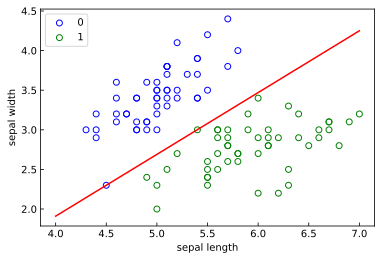

In [8]:
# display data
x_points = np.linspace(4, 7, 10)
y_ = -(perceptron.w[0] * x_points + perceptron.b) / perceptron.w[1]

plt.figure(figsize=(6,4))
plt.tick_params(direction='in')
plt.scatter(df[:50]['sepal length'], df[:50]['sepal width'],c='',edgecolors='b',label='0')
plt.scatter(df[50:100]['sepal length'], df[50:100]['sepal width'],c='',edgecolors='g',label='1')
plt.plot(x_points, y_,c='r')

plt.xlabel('sepal length')
plt.ylabel('sepal width')
plt.legend()